# Problem Statement
Build a sentiment classification model to predict emotion/sentiment from text using classical NLP techniques and machine learning.

# Import Required Packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Extract Data

In [40]:
df = pd.read_csv('data.txt',sep = ';',header = None,names = ['text','emotion'])

In [41]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Checking Null values

In [42]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

# Class Distribution

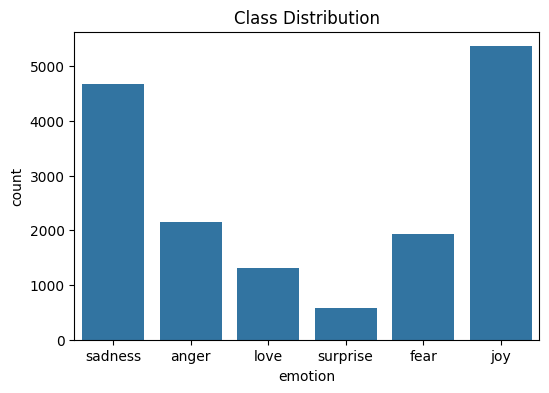

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['emotion'])
plt.title("Class Distribution")
plt.show()

# Converting output vaiable into numeric

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['emotion'] = le.fit_transform(df['emotion'])

In [45]:
df

,text,emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


# Text Cleaning

### Lowercasing

In [46]:
df['text'] = df['text'].apply(lambda x : x.lower())

### Remove Punctuations

In [47]:
import string

def remove_punc(txt):
    return txt.translate(str.maketrans('','',string.punctuation))


In [48]:
df['text'] = df['text'].apply(remove_punc)

### Remove Numbers

In [49]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)

### remove emojis

In [50]:
def remove_emojis(txt):
    new = ""
    for i in txt:
        if i.isascii():
            new += i
    return new

df['text'] = df['text'].apply(remove_emojis)

### Remove Stopwords

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
nltk.download('punkt_tab') #library used for tokenization
nltk.download('stopwords') #library contains all stopwords

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# get the english stopwords
stop_words = set(stopwords.words('english'))

In [54]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [55]:
def remove(txt):
  words = word_tokenize(txt)
  cleaned = []
  for i in words:
    if i not in stop_words:
      cleaned.append(i)

  return ' '.join(cleaned)

In [56]:
df['text'] = df['text'].apply(remove)

In [57]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [58]:
df.head()

,text,emotion
0,didnt feel humiliated,4
1,go feeling hopeless damned hopeful around some...,4
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,0


# Train test split (Stratified)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.20, random_state=42, stratify=df['emotion'])

# Text Vectorization

### Using BoW

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

### Using TF-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model training - testing using Navive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score

### NB using BoW

In [63]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

nb_pred_bow = nb_model.predict(X_test_bow)
print("\nF1-score:", f1_score(y_test, nb_pred_bow, average='weighted'))
print(classification_report(y_test, nb_pred_bow))


F1-score: 0.7571376233035468
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       432
           1       0.86      0.63      0.73       387
           2       0.75      0.93      0.83      1072
           3       0.88      0.31      0.46       261
           4       0.76      0.94      0.84       933
           5       0.79      0.10      0.17       115

    accuracy                           0.78      3200
   macro avg       0.82      0.60      0.63      3200
weighted avg       0.80      0.78      0.76      3200



### NB using TF-IDF

In [64]:
nb2_model = MultinomialNB()
nb2_model.fit(X_train_tfidf,y_train)

nb_pred_tfidf = nb2_model.predict(X_test_tfidf)
print("\nF1-score:", f1_score(y_test, nb_pred_tfidf, average='weighted'))
print(classification_report(y_test, nb_pred_tfidf))


F1-score: 0.6009833400963435
              precision    recall  f1-score   support

           0       0.95      0.29      0.44       432
           1       0.94      0.26      0.41       387
           2       0.62      0.98      0.76      1072
           3       1.00      0.06      0.12       261
           4       0.68      0.92      0.78       933
           5       0.00      0.00      0.00       115

    accuracy                           0.67      3200
   macro avg       0.70      0.42      0.42      3200
weighted avg       0.73      0.67      0.60      3200



# Model training using Logistic Regtession

In [65]:
from sklearn.linear_model import LogisticRegression

### LR using BoW

In [66]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_bow,y_train)

lr_pred_bow = lr_model.predict(X_test_bow)
print("\nF1-score:", f1_score(y_test, lr_pred_bow, average='weighted'))
print(classification_report(y_test, lr_pred_bow))


F1-score: 0.8898234463647583
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       432
           1       0.87      0.85      0.86       387
           2       0.89      0.93      0.91      1072
           3       0.79      0.77      0.78       261
           4       0.93      0.93      0.93       933
           5       0.82      0.76      0.79       115

    accuracy                           0.89      3200
   macro avg       0.87      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200



### LR using TF-IDF

In [67]:
lr2_model = LogisticRegression(max_iter=1000)
lr2_model.fit(X_train_tfidf,y_train)

lr_pred_tfidf = lr2_model.predict(X_test_tfidf)
print("\nF1-score:", f1_score(y_test, lr_pred_tfidf, average='weighted'))
print(classification_report(y_test, lr_pred_tfidf))


F1-score: 0.8607593103508576
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       432
           1       0.88      0.80      0.84       387
           2       0.82      0.95      0.88      1072
           3       0.87      0.63      0.73       261
           4       0.90      0.94      0.92       933
           5       0.93      0.55      0.69       115

    accuracy                           0.86      3200
   macro avg       0.88      0.77      0.82      3200
weighted avg       0.87      0.86      0.86      3200



# Hyperparameter Tuning

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### BoW + Logistic Regression

In [69]:
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

bow_param_grid = {
    'vectorizer__max_features': [3000, 5000, 10000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

bow_grid = GridSearchCV(
    bow_pipeline,
    bow_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

bow_grid.fit(X_train, y_train)

print("Best Parameters (BoW):", bow_grid.best_params_)

Best Parameters (BoW): {'clf__C': 1, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}


### TF-IDF + Logistic Regression

In [70]:
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

tfidf_param_grid = {
    'vectorizer__max_features': [3000, 5000, 10000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

tfidf_grid = GridSearchCV(
    tfidf_pipeline,
    tfidf_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

tfidf_grid.fit(X_train, y_train)

print("Best Parameters (TF-IDF):", tfidf_grid.best_params_)

Best Parameters (TF-IDF): {'clf__C': 10, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}


# Evaluate Both Models

In [71]:
# BoW Evaluation
bow_pred = bow_grid.predict(X_test)
print("\nBoW F1-score:", f1_score(y_test, bow_pred, average='weighted'))
print(classification_report(y_test, bow_pred))

# TF-IDF Evaluation
tfidf_pred = tfidf_grid.predict(X_test)
print("\nTF-IDF F1-score:", f1_score(y_test, tfidf_pred, average='weighted'))
print(classification_report(y_test, tfidf_pred))


BoW F1-score: 0.9017296059409784
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       432
           1       0.90      0.87      0.88       387
           2       0.89      0.93      0.91      1072
           3       0.81      0.79      0.80       261
           4       0.94      0.95      0.94       933
           5       0.82      0.75      0.78       115

    accuracy                           0.90      3200
   macro avg       0.88      0.86      0.87      3200
weighted avg       0.90      0.90      0.90      3200


TF-IDF F1-score: 0.9010414834682081
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       432
           1       0.90      0.87      0.88       387
           2       0.89      0.94      0.91      1072
           3       0.82      0.75      0.78       261
           4       0.94      0.94      0.94       933
           5       0.85      0.77      0.80       115

    ac

# Compare Results

In [72]:
results = pd.DataFrame({
    "Model": ["Bag of Words", "TF-IDF"],
    "F1-Score": [
        f1_score(y_test, bow_pred, average='weighted'),
        f1_score(y_test, tfidf_pred, average='weighted')
    ]
})

print(results)

          Model  F1-Score
0  Bag of Words  0.901730
1        TF-IDF  0.901041


# save the best model

In [73]:
import joblib

final_model = bow_grid.best_estimator_
joblib.dump(final_model, "emotion_bow_lr_90f1.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Final model saved successfully!")

Final model saved successfully!


# Final Notes

* Used BoW with bigrams for improved context capture
* Used stratified split to handle class imbalance
* Evaluated using weighted F1-score for Multi-class classification
* Performed hyperparameter tuning
* Saved final model for deployment
* Logistic Regression is choosen
    * Linear
    * Robust to correlated features
    * Good with sparse high-dimensional data
* choosed the simpler model (BoW).
    * It has slightly higher F1
    * It is simpler
    * It trains faster
    * It’s computationally lighter
    * Since performance difference is tiny.
* Although TF-IDF is generally useful for reducing the importance of common words, in my dataset high-frequency sentiment words were highly predictive. Logistic Regression was able to learn optimal feature weights, and cross-validation showed that Bag of Words achieved better F1-score.